In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

In [ ]:
#Default dimensions we found online
img_width, img_height = 224, 224
   
#Create a bottleneck file
top_model_weights_path = '/content/drive/MyDrive/Colab Notebooks/NEW DATA1/data sets.h5' 

# loading up our datasets
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/NEW DATA1/data sets/train'  
validation_data_dir = '/content/drive/MyDrive/Colab Notebooks/NEW DATA1/data sets/validation'  
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/NEW DATA1/data sets/test'
   
# number of epochs to train top model  
epochs = 7  #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size = 50

In [ ]:
#Loading vgc16 model
#vgg16 = applications.VGG16(include_top=False, weights='imagenet')


	
from keras.applications.vgg16 import VGG16
# load the model
vgg16 = VGG16()



In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)  #needed to create the bottleneck .npy files

In [ ]:
start = datetime.datetime.now()
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 209 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Time:  0:01:49.901336


In [ ]:



print('-'*117)



---------------------------------------------------------------------------------------------------------------------


In [ ]:


#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)



Found 76 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Time:  0:00:39.747062


In [ ]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [ ]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict_generator(  
     generator, predict_size_test)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 76 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Time:  0:00:40.125878


In [ ]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [ ]:
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 209 images belonging to 4 classes.


In [ ]:
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 76 images belonging to 4 classes.


In [ ]:
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 76 images belonging to 4 classes.


In [ ]:


#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=7,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  


(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/7
5/5 [==============================] - 1s 91ms/step - loss: 1.3860 - acc: 0.2517 - val_loss: 1.3833 - val_acc: 0.4342
Epoch 2/7
5/5 [==============================] - 0s 9ms/step - loss: 1.3840 - acc: 0.3121 - val_loss: 1.3806 - val_acc: 0.4342
Epoch 3/7
5/5 [==============================] - 0s 9ms/step - loss: 1.3820 - acc: 0.3661 - val_loss: 1.3785 - val_acc: 0.4342
Epoch 4/7
5/5 [==============================] - 0s 10ms/step - loss: 1.3802 - acc: 0.3552 - val_loss: 1.3765 - val_acc: 0.4342
Epoch 5/7
5/5 [==============================] - 0s 9ms/step - loss: 1.3777 - acc: 0.3497 - val_loss: 1.3746 - val_acc: 0.4342
Epoch 6/7
5/5 [==============================] - 0s 10ms/step - loss: 1.3749 - acc: 0.3664 - val_loss: 1.3730 - val_acc: 0.4342
Epoch 7/7
2/2 [==============================] - 0s 7ms/step - loss: 1.3711 - acc: 0.4342
[INFO] accuracy: 43.42%
[INFO] Loss: 1.3711369037628174
Time:  0:00:02.542095


In [ ]:


#Model summary
model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               100100    
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 204       
Total params: 105,354
Trainable params: 105,354
Non-trainable params: 0
________________________________________________

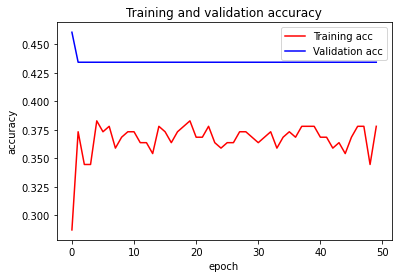

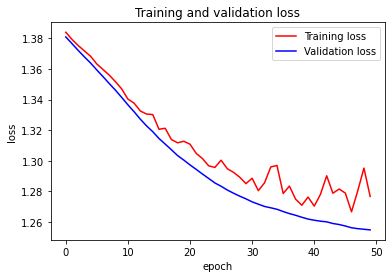

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()



In [ ]:


model.evaluate(test_data, test_labels)



3/3 [==============================] - 0s 4ms/step - loss: 1.2549 - acc: 0.4342


[1.2548894882202148, 0.43421053886413574]

In [ ]:
print('test data', test_data)
preds = np.round(model.predict(test_data),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)


test data [[1.21682999e-04 2.57486128e-03 4.36496659e-04 ... 9.93045469e-05
  2.09234044e-04 3.46952528e-02]
 [1.47983068e-04 2.70109205e-03 4.48345643e-04 ... 1.12268914e-04
  2.08329744e-04 2.93318350e-02]
 [1.77963855e-04 2.39576702e-03 4.54181893e-04 ... 9.30786919e-05
  2.43458591e-04 1.60026439e-02]
 ...
 [1.40138349e-04 2.43328232e-03 4.96895169e-04 ... 7.52630949e-05
  2.15705702e-04 2.73886211e-02]
 [1.60126525e-04 2.34466372e-03 6.42409839e-04 ... 7.83914365e-05
  1.86958074e-04 2.14189459e-02]
 [2.02253781e-04 2.46929284e-03 4.87034296e-04 ... 1.00618519e-04
  2.45648116e-04 1.41387973e-02]]
rounded test_labels [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0.

In [ ]:


shapes = ['circle', 'rectangle', 'square', 'triangle']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=shapes )
print(classification_metrics)



              precision    recall  f1-score   support

      circle       0.00      0.00      0.00        22
   rectangle       0.00      0.00      0.00         7
      square       0.00      0.00      0.00        14
    triangle       0.00      0.00      0.00        33

   micro avg       0.00      0.00      0.00        76
   macro avg       0.00      0.00      0.00        76
weighted avg       0.00      0.00      0.00        76
 samples avg       0.00      0.00      0.00        76



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [ ]:
def test_single_image(path):
    shapes = ['circle', 'rectangle', 'square', 'triangle']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)  
    preds = model.predict_proba(bt_prediction)
    for idx, animal, x in zip(range(0,6), shapes , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)

In [ ]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [ ]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

TypeError: ignored

In [ ]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


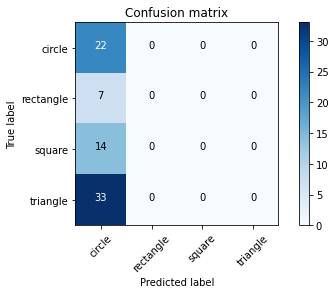

In [ ]:
plot_confusion_matrix(confusion_matrix, ['circle', 'rectangle', 'square', 'triangle'])

[INFO] loading and preprocessing image...


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


ID: 0, Label: circle 1.01%
ID: 1, Label: rectangle 2.64%
ID: 2, Label: square 30.13%
ID: 3, Label: triangle 66.22%
Final Decision:
.
..
...
ID: 3, Label: triangle


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


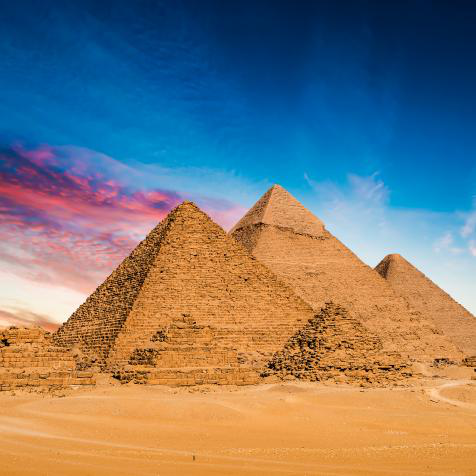

In [279]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/1582654574644.jpeg")


path = '/content/1582654574644.jpeg'

test_single_image(path)

In [280]:
!pip3 install numpy-stl

     |████████████████████████████████| 778kB 5.2MB/s 
  Created wheel for numpy-stl: filename=numpy_stl-2.16.0-cp37-cp37m-linux_x86_64.whl size=136515 sha256=9595804eb13319b2c178727b814150266d2d0b98c5d5914373f9aab42c8c8186
  Stored in directory: /root/.cache/pip/wheels/87/f6/84/c9aa9fcb4ead4dbae9f4b09647ae2395e5ded99ef117499efa
Successfully built numpy-stl


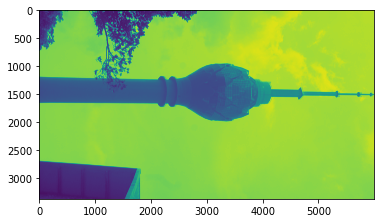

In [302]:
grey_img = Image.open('/content/DSC04701.JPG').convert('L')
plt.imshow(grey_img)

In [303]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1]])

# Define the 12 triangles composing the cube
faces = np.array([\
    [1,2,3],
    [3,1,0]
])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('surface.stl')

In [305]:
grey_img = Image.open('/content/DSC04701.JPG').convert('L')

max_size=(200,200)
max_height=10
min_height=0

#height=0 for minPix
#height=maxHeight for maxPIx

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()



print(imageNp)
(ncols,nrows)=grey_img.size

vertices=np.zeros((nrows,ncols,3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    z = (pixelIntensity * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[y][x]=(x, y, z)

faces=[]

for x in range(0, ncols - 1):
  for y in range(0, nrows - 1):
    # create face 1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    # create face 2 
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]

    face2 = np.array([vertice1,vertice2,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file "cube.stl"
surface.save('surfacenew.stl')
print(surface)

[[ 28  23  29 ... 228 227 227]
 [ 29  22  22 ... 228 227 227]
 [ 29  23  23 ... 227 227 227]
 ...
 [ 19  20  19 ... 206 206 206]
 [ 24  24  23 ... 207 206 206]
 [ 29  29  28 ... 206 206 205]]
number of faces: 44576


In [306]:

a = np.zeros((3, 3))
a[:,0]=3
print(a[:,0])

print(a)

[3. 3. 3.]
[[3. 0. 0.]
 [3. 0. 0.]
 [3. 0. 0.]]


In [307]:
!ls -alh /content

total 15M
drwxr-xr-x 1 root root 4.0K Jun 14 10:47  .
drwxr-xr-x 1 root root 4.0K Jun 14 07:13  ..
-rw-r--r-- 1 root root  34K Jun 14 09:28  1582654574644.jpeg
-rw-r--r-- 1 root root  26K Jun 14 08:26  345.png
-rw-r--r-- 1 root root 297K Jun 14 08:33  bottleneck_features_test.npy
-rw-r--r-- 1 root root 817K Jun 14 08:31  bottleneck_features_train.npy
-rw-r--r-- 1 root root 297K Jun 14 08:32  bottleneck_features_validation.npy
-rw-r--r-- 1 root root  50K Jun 14 09:26  c1.jpg
drwxr-xr-x 4 root root 4.0K Jun  1 13:40  .config
-rw-r--r-- 1 root root 7.0M Jun 14 09:28  cubenew.psd
-rw-r--r-- 1 root root 2.5K Jun 14 08:27  cube.png
-rw-r--r-- 1 root root 497K Jun 14 10:46  doggo.png
drwx------ 5 root root 4.0K Jun 14 07:18  drive
-rw-r--r-- 1 root root 2.3M Jun 14 10:48  DSC04701.JPG
-rw-r--r-- 1 root root 275K Jun 14 09:28 'gurukula flyer.psd'
drwxr-xr-x 2 root root 4.0K Jun 14 08:28  .ipynb_checkpoints
-rw-r--r-- 1 root root  495 Jun 14 08:36 'new t.png'
drwxr-xr-x 1 root root 4.0K Jun  1 